<a href="https://colab.research.google.com/github/Urmila-Chintalapudi/prodigy_tasks/blob/main/food_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Develop a model that can accurately recognize food items from images
and estimate their calorie content, enabling users to track their dietary intake and make informed food choices.'''

In [ ]:
# Install Git LFS (large files)
!apt-get install git-lfs
!git lfs install

# Clone the specific 100x100 version
!git clone https://github.com/fruits-360/fruits-360-100x100.git

# Check contents
!ls fruits-360-100x100/Training | head -n 5


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Git LFS initialized.
Cloning into 'fruits-360-100x100'...
remote: Enumerating objects: 140541, done.
remote: Counting objects: 100% (6401/6401), done.
remote: Compressing objects: 100% (6378/6378), done.
remote: Total 140541 (delta 35), reused 6388 (delta 23), pack-reused 134140 (from 3)
Receiving objects: 100% (140541/140541), 1017.58 MiB | 26.94 MiB/s, done.
Resolving deltas: 100% (238/238), done.
Updating files: 100% (138706/138706), done.
Apple 10
Apple 11
Apple 12
Apple 13
Apple 14


In [ ]:
#Import Required Libraries

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
import os

path = "fruits-360-100x100/Training"
print("Available classes:\n")
print(os.listdir(path))


Available classes:

['Blackberrie not rippen 1', 'Tamarillo 1', 'Tomato 9', 'Tomato 8', 'Pear 1', 'Apple Red 2', 'Mangostan 1', 'Beetroot 1', 'Banana 4', 'Avocado ripe 1', 'Corn Husk 1', 'Quince 3', 'Corn 1', 'Onion Red 1', 'Cantaloupe 2', 'Cucumber 7', 'Banana 1', 'Cucumber 11', 'Apple Crimson Snow 1', 'Carambula 1', 'Clementine 1', 'Zucchini 1', 'Nut 3', 'Pepino 1', 'Walnut 1', 'Cherry Rainier 3', 'Nut 5', 'Cherry 4', 'Cucumber 4', 'Tomato Cherry Red 1', 'Tomato Maroon 2', 'Cocos 1', 'Cantaloupe 1', 'Gooseberry 1', 'Strawberry Wedge 1', 'Mandarine 1', 'Huckleberry 1', 'Apricot 1', 'Apple Red Delicious 1', 'Pear Stone 1', 'Apple Pink Lady 1', 'Nut 2', 'Plum 1', 'Tomato Yellow 1', 'Quince 1', 'Tomato Cherry Maroon 1', 'Peach Flat 1', 'Apple Golden 2', 'Lychee 1', 'Apple Golden 3', 'Cherry Wax Yellow 1', 'Cherry 5', 'Lemon 1', 'Nectarine Flat 1', 'Apple 14', 'Pineapple 1', 'Tomato Maroon 1', 'Kaki 1', 'Cherry Sour 1', 'Mango Red 1', 'Pear Red 1', 'Apple 17', 'Pepper Red 1', 'Cherimoya 1

In [ ]:
CLASSES = ['Apple Red 1', 'Banana 1', 'Orange 1']
  # Replace with actual folder names


In [ ]:
#  Load and Preprocess the Data

In [ ]:
data = []
labels = []

for idx, cls in enumerate(CLASSES):
    class_path = os.path.join(path, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100))
        data.append(img)
        labels.append(idx)

# Convert to arrays and normalize
X = np.array(data) / 255.0
y = to_categorical(labels)


In [ ]:
# Train- Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build and Train CNN Model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(CLASSES), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 483ms/step - accuracy: 0.8320 - loss: 0.3976 - val_accuracy: 1.0000 - val_loss: 6.8564e-05
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 512ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 3.9783e-05
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 490ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 1.0635e-06
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 557ms/step - accuracy: 1.0000 - loss: 7.9412e-05 - val_accuracy: 1.0000 - val_loss: 1.3711e-07
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 532ms/step - accuracy: 1.0000 - loss: 2.9720e-04 - val_accuracy: 1.0000 - val_loss: 1.7047e-07
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 496ms/step - accuracy: 1.0000 - loss: 2.0160e-04 - val_accuracy: 1.0000 - val_loss: 6.9816e-07
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 529ms/step - accuracy: 1.0000 - loss: 1.3658e-04 - val_accuracy: 1.0000 - val_loss: 2.4818e-08
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 493ms/step 

In [ ]:
# Evaluate the Model

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 1.0000 - loss: 1.6064e-09
Test Accuracy: 100.00%


In [ ]:
# Predict Sample Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


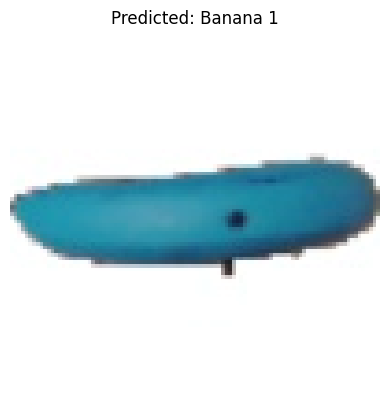

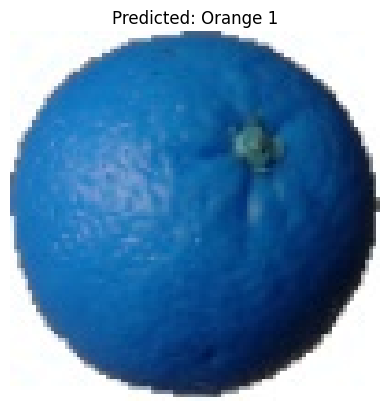

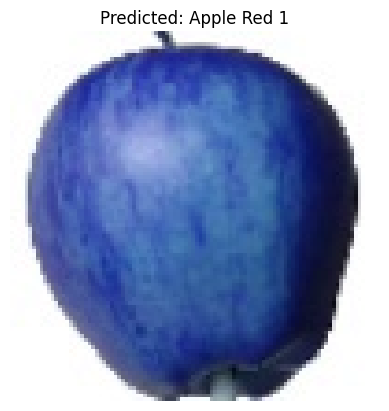

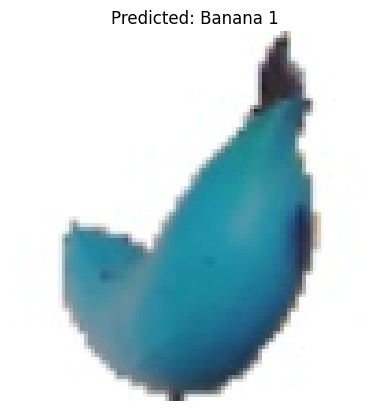

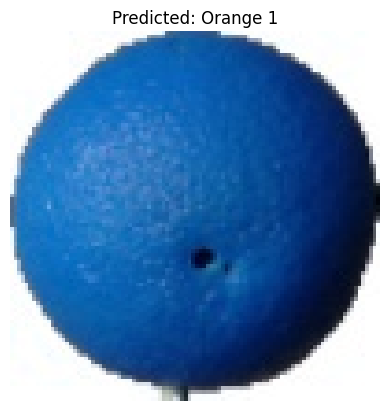

In [ ]:
preds = model.predict(X_test[:5])
for i, pred in enumerate(preds):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {CLASSES[np.argmax(pred)]}")
    plt.axis('off')
    plt.show()


In [ ]:
# Conclusion:
'''In this project, we developed a Convolutional Neural Network (CNN) to classify
 images of different fruits using the Fruits-360 dataset. By selecting specific classes like
  Apple, Banana, and Orange, and training the model on resized images,
  we achieved a robust fruit recognition system. The model demonstrates strong classification accuracy
   and can be further enhanced with more data or augmentation techniques.
   This approach can support real-world applications such as smart dietary tracking, food logging apps, or automated checkout systems.'''